In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys
sys.path.append(f'/home/beans/bespoke')

from constants import *
from imports import *
from train_utils import *
from loaders import TrnLoader
from viz_utils import *
from rollout import *

In [2]:
%%time
BS = 16 # 64
seqlen = 60 #80
loader = TrnLoader(bs=BS, n_batches=40, seqlen=seqlen, bptt=2, n_workers=2) # 600

/home/beans/miniconda3/envs/py38/lib/python3.8/site-packages/albumentations/augmentations/transforms.py:316: FutureWarning: JpegCompression has been deprecated. Please use ImageCompression
  warnings.warn(
/home/beans/miniconda3/envs/py38/lib/python3.8/site-packages/albumentations/augmentations/transforms.py:316: FutureWarning: JpegCompression has been deprecated. Please use ImageCompression
  warnings.warn(


waiting for chunk
waiting for chunk
waiting for chunk
CPU times: user 324 ms, sys: 2.2 s, total: 2.52 s
Wall time: 13.7 s


In [3]:
%%time
# Rollout using only cnn
m = EffNet().to(device)
stem = '6.1_e45'
m.load_state_dict(torch.load(f"{BESPOKE_ROOT}/models/m{stem}.torch"))
m.use_rnn = False
rollout = Rollout(loader, stem, m=m, store_imgs=True)

resetting hidden carousel
resetting hidden carousel
Stopsign approaching! 60.6
Stopsign approaching! 60.95
Stopsign approaching! 60.83
Stopsign approaching! 60.03
Stopsign approaching! 58.72
Stopsign approaching! 57.08
Stopsign approaching! 54.64
Stopsign approaching! 51.88
Stopsign approaching! 48.83
Stopsign approaching! 45.31
Stopsign approaching! 41.56
Stopsign approaching! 37.73
Stopsign approaching! 59.7
Stopsign approaching! 58.47
Stopsign approaching! 56.7
Stopsign approaching! 54.11
Stopsign approaching! 50.8
Stopsign approaching! 46.9
Stopsign approaching! 43.13
Stopsign approaching! 41.87
Stopsign approaching! 42.27
Stopsign approaching! 42.18
Stopsign approaching! 41.7
Stopsign approaching! 40.71
Stopsign approaching! 39.41
Stopsign approaching! 37.92
Stopsign approaching! 35.97
Stopsign approaching! 33.72
Stopsign approaching! 31.57
Stopsign approaching! 29.41
Stopsign approaching! 27.3
Stopsign approaching! 25.17
Stopsign approaching! 23.19
Stopsign approaching! 21.17
Sto

In [4]:
%%time
#rollout = Rollout(loader, "4.13_e33", store_imgs=True)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs


In [5]:
make_enriched_vid_trn(rollout)

0
1000
sim_6.1_e45 done!


(array([220., 140., 124., 119.,  80.,  78.,  64.,  66.,  60.,  49.]),
 array([0.22058619, 0.28604196, 0.35149774, 0.41695351, 0.48240929,
        0.54786506, 0.61332084, 0.67877661, 0.74423239, 0.80968817,
        0.87514394]),
 <BarContainer object of 10 artists>)

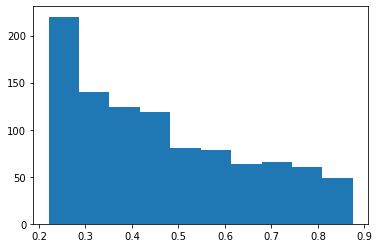

In [13]:
vv = []
for i in range(1000):
    vv.append(.22 * 10**random.uniform(0, .6))
plt.hist(vv)

In [5]:
#skipify(rollout, skip=20)

In [6]:
rollout.img.shape

(960, 360, 1440, 4)

In [7]:
%%time
rollout_f = f"{BESPOKE_ROOT}/tmp/trn_{rollout.model_stem}_rollout.pkl"

save_object(rollout, rollout_f)

CPU times: user 6.91 s, sys: 1.74 s, total: 8.66 s
Wall time: 10.7 s


In [7]:
rollout.img.shape

(1920, 360, 1440, 4)